## Importing dataset and installing libraries

In [52]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------------------------------ -- 583.7/626.3 kB 18.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 9.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\TIRATH BHATHAWALA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
df = pd.read_csv("../../resources/annotations_sample.csv")

In [39]:
df.head()

Index                                               Text      CLA  \
0  B11bwYgfM-R1  The idea of using cross-task transfer performa...  CLA-POS   
1  B11bwYgfM-R2  This paper proposes a method for multitask and...  CLA-POS   
2  B11bwYgfM-R3  The authors propose techniques for multitask a...  CLA-POS   
3  B12Js_yRb-R1  \nSummary: \n- This paper proposes a hand-desi...  CLA-POS   
4  B12Js_yRb-R2  Summary\n - This paper mainly focuses on a cou...  CLA-POS   

       JUS      DEP      FAI      CON      ENG      ACC      CST      NOV  \
0  JUS-POS  DEP-POS  FAI-POS  CON-NEG  ENG-POS  ACC-POS  CST-POS  NOV-NEG   
1  JUS-POS  DEP-POS  FAI-POS  CON-POS  ENG-POS  ACC-POS  CST-POS  NOV-NEG   
2  JUS-POS  DEP-POS  FAI-POS  CON-POS  ENG-POS  ACC-POS  CST-POS  NOV-NEG   
3  JUS-POS  DEP-POS  FAI-NEU  CON-NEU  ENG-NEU  ACC-NEU  CST-NEU  NOV-NEU   
4  JUS-POS  DEP-POS  FAI-NEU  CON-NEU  ENG-NEU  ACC-NEU  CST-NEU  NOV-NEU   

       ETH  
0  ETH-NEU  
1  ETH-NEU  
2  ETH-NEU  
3  ETH-NEU  
4  ETH-NEU

In [40]:
for column in df.columns:
    if column != 'Text' and column != 'Index':
        for index, value in enumerate(df[column]):
            df[column][index] = value[4:]

In [41]:
encoding_map = {'POS': 1, 'NEU': 0, 'NEG': -1}
annotation_columns = ['CLA', 'JUS', 'DEP', 'FAI', 'CON', 'ENG', 'ACC', 'CST', 'NOV', 'ETH']
df[annotation_columns] = df[annotation_columns].applymap(lambda x: encoding_map.get(x, x))

In [42]:
column_rename_map = {
    'CLA': 'Clarity of Review',
    'JUS': 'Justification of Scores',
    'DEP': 'Depth of Analysis',
    'FAI': 'Fairness and Objectivity',
    'CON': 'Constructiveness of Feedback',
    'ENG': 'Engagement with Related Work',
    'ACC': 'Accuracy in Understanding',
    'CST': 'Consistency of Evaluation',
    'NOV': 'Identification of Novelty',
    'ETH': 'Ethical Considerations and Responsibility'
}

df.rename(columns=column_rename_map, inplace=True)

In [43]:
df.head()

Index                                               Text  \
0  B11bwYgfM-R1  The idea of using cross-task transfer performa...   
1  B11bwYgfM-R2  This paper proposes a method for multitask and...   
2  B11bwYgfM-R3  The authors propose techniques for multitask a...   
3  B12Js_yRb-R1  \nSummary: \n- This paper proposes a hand-desi...   
4  B12Js_yRb-R2  Summary\n - This paper mainly focuses on a cou...   

   Clarity of Review  Justification of Scores  Depth of Analysis  \
0                  1                        1                  1   
1                  1                        1                  1   
2                  1                        1                  1   
3                  1                        1                  1   
4                  1                        1                  1   

   Fairness and Objectivity  Constructiveness of Feedback  \
0                         1                            -1   
1                         1                             1   
2                         1                             1   
3                         0                             0   
4                         0                             0   

   Engagement with Related Work  Accuracy in Understanding  \
0                             1                          1   
1                             1                          1   
2                             1                          1   
3                             0                          0   
4                             0                          0   

   Consistency of Evaluation  Identification of Novelty  \
0                          1                         -1   
1                          1                         -1   
2                          1                         -1   
3                          0                          0   
4                          0                          0   

   Ethical Considerations and Responsibility  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0

In [44]:
df.describe()

Clarity of Review  Justification of Scores  Depth of Analysis  \
count         903.000000               903.000000         903.000000   
mean            0.868217                 0.810631           0.795127   
std             0.455708                 0.551774           0.558247   
min            -1.000000                -1.000000          -1.000000   
25%             1.000000                 1.000000           1.000000   
50%             1.000000                 1.000000           1.000000   
75%             1.000000                 1.000000           1.000000   
max             1.000000                 1.000000           1.000000   

       Fairness and Objectivity  Constructiveness of Feedback  \
count                903.000000                    903.000000   
mean                   0.069767                      0.462901   
std                    0.454839                      0.612605   
min                   -1.000000                     -1.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      1.000000   
75%                    0.000000                      1.000000   
max                    1.000000                      1.000000   

       Engagement with Related Work  Accuracy in Understanding  \
count                    903.000000                 903.000000   
mean                       0.457364                   0.426357   
std                        0.588233                   0.642933   
min                       -1.000000                  -1.000000   
25%                        0.000000                   0.000000   
50%                        1.000000                   1.000000   
75%                        1.000000                   1.000000   
max                        1.000000                   1.000000   

       Consistency of Evaluation  Identification of Novelty  \
count                 903.000000                 903.000000   
mean                    0.410853                   0.009967   
std                     0.646133                   0.686350   
min                    -1.000000                  -1.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     1.000000                   0.000000   
max                     1.000000                   1.000000   

       Ethical Considerations and Responsibility  
count                                 903.000000  
mean                                    0.001107  
std                                     0.191270  
min                                    -1.000000  
25%                                     0.000000  
50%                                     0.000000  
75%                                     0.000000  
max                                     1.000000

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Index                                      903 non-null    object
 1   Text                                       897 non-null    object
 2   Clarity of Review                          903 non-null    int64 
 3   Justification of Scores                    903 non-null    int64 
 4   Depth of Analysis                          903 non-null    int64 
 5   Fairness and Objectivity                   903 non-null    int64 
 6   Constructiveness of Feedback               903 non-null    int64 
 7   Engagement with Related Work               903 non-null    int64 
 8   Accuracy in Understanding                  903 non-null    int64 
 9   Consistency of Evaluation                  903 non-null    int64 
 10  Identification of Novelty             

In [64]:
metrics = ['Clarity of Review', 'Justification of Scores', 'Depth of Analysis', 'Fairness and Objectivity', 'Constructiveness of Feedback', 'Engagement with Related Work', 'Accuracy in Understanding', 'Consistency of Evaluation', 'Identification of Novelty', 'Ethical Considerations and Responsibility']

## Basic Visualization

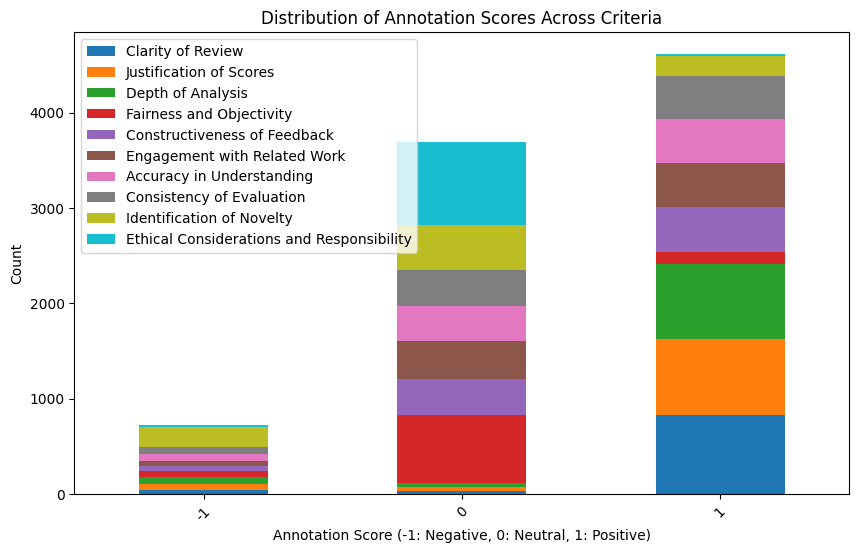

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

score_distribution = df[metrics].apply(pd.Series.value_counts)

score_distribution.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Distribution of Annotation Scores Across Criteria')
plt.xlabel('Annotation Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

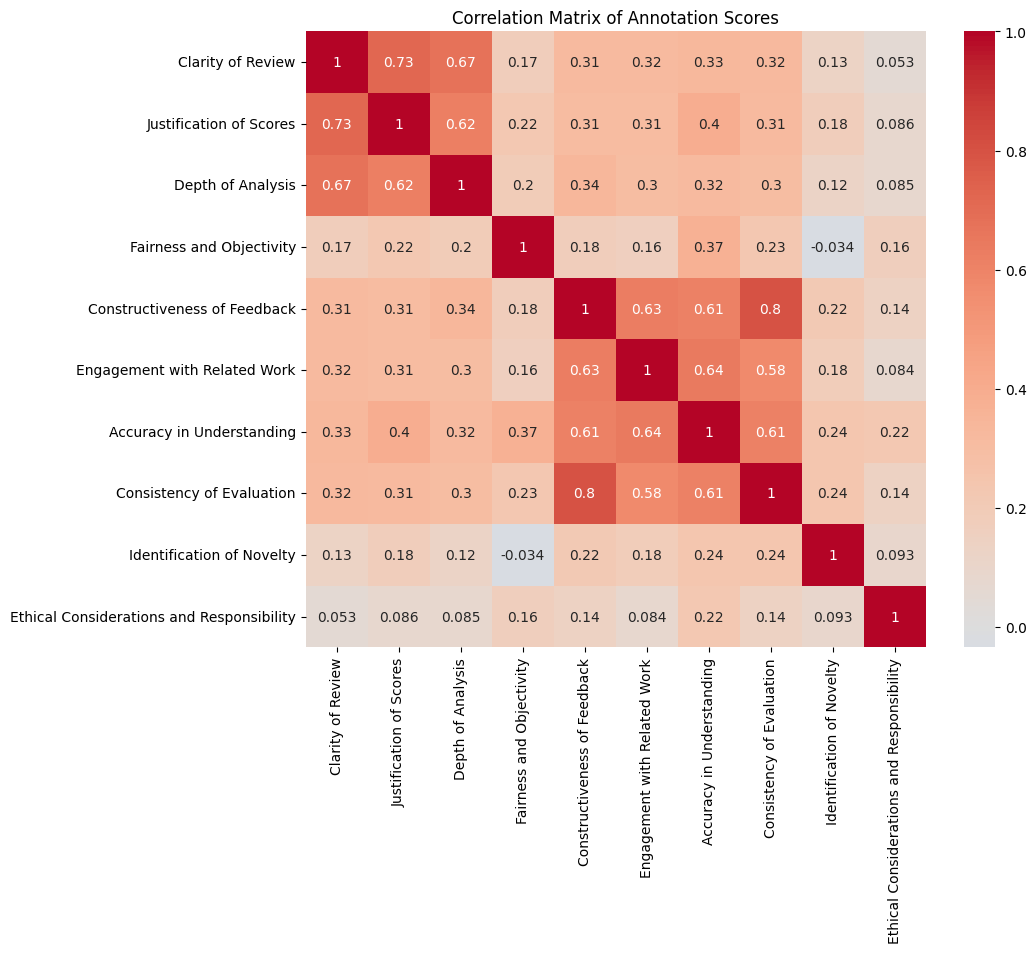

In [66]:
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Annotation Scores')
plt.show()

In [67]:
score_counts = df[metrics].apply(lambda col: col.value_counts())
score_counts

Clarity of Review  Justification of Scores  Depth of Analysis  \
-1                 42                       68                 67   
 0                 35                       35                 51   
 1                826                      800                785   

    Fairness and Objectivity  Constructiveness of Feedback  \
-1                        64                            57   
 0                       712                           371   
 1                       127                           475   

    Engagement with Related Work  Accuracy in Understanding  \
-1                            44                         76   
 0                           402                        366   
 1                           457                        461   

    Consistency of Evaluation  Identification of Novelty  \
-1                         79                        208   
 0                        374                        478   
 1                        450                        217   

    Ethical Considerations and Responsibility  
-1                                         16  
 0                                        870  
 1                                         17

## Box and Whiskers Plot

In [49]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\TIRATH
[nltk_data]     BHATHAWALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
from collections import Counter
import re

def tokenize_text(text):
    if isinstance(text, str): 
        tokens = re.findall(r'\b\w+\b', text.lower())
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    return []

all_words = df['Text'].apply(tokenize_text).sum()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))

Most common words: [('n', 6767), ('paper', 2786), ('authors', 1365), ('would', 1044), ('results', 1042), ('model', 1023), ('1', 927), ('proposed', 882), ('method', 877), ('learning', 841)]


In [72]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return None

df['Sentiment'] = df['Text'].apply(get_sentiment)
metrics.append("Sentiment")
correlation_with_sentiment = df[metrics].corr()['Sentiment'].drop('Sentiment')
correlation_with_sentiment

Clarity of Review                            0.195441
Justification of Scores                      0.215476
Depth of Analysis                            0.190832
Fairness and Objectivity                     0.019166
Constructiveness of Feedback                 0.135241
Engagement with Related Work                 0.110307
Accuracy in Understanding                    0.150193
Consistency of Evaluation                    0.126445
Identification of Novelty                    0.199671
Ethical Considerations and Responsibility    0.071317
Name: Sentiment, dtype: float64

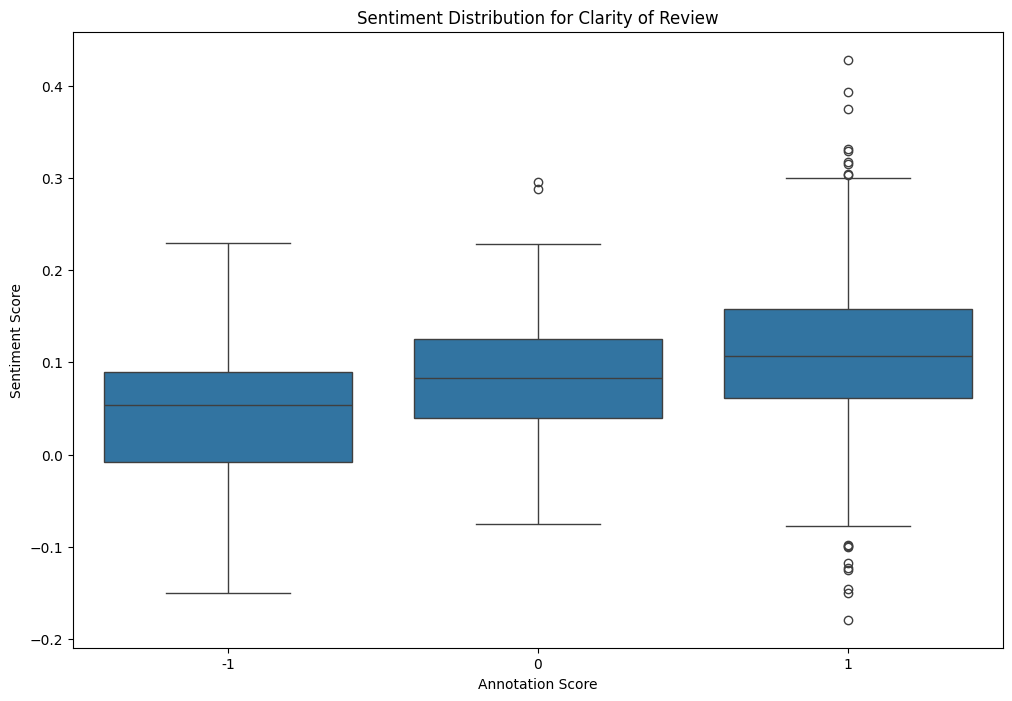

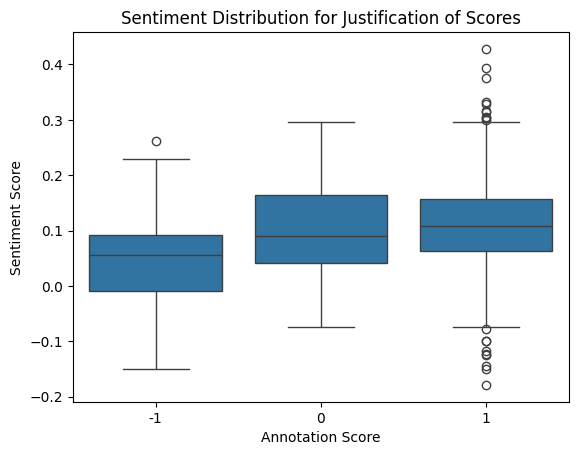

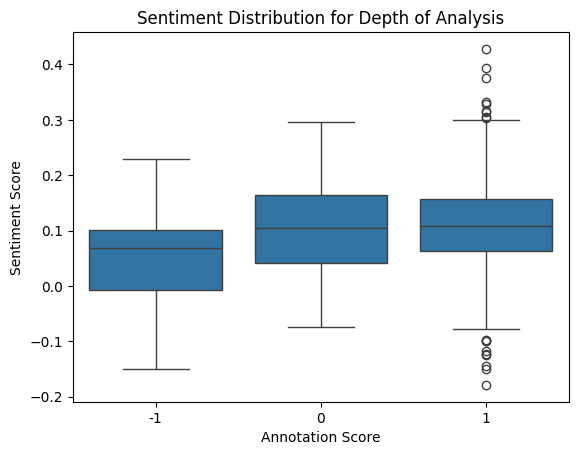

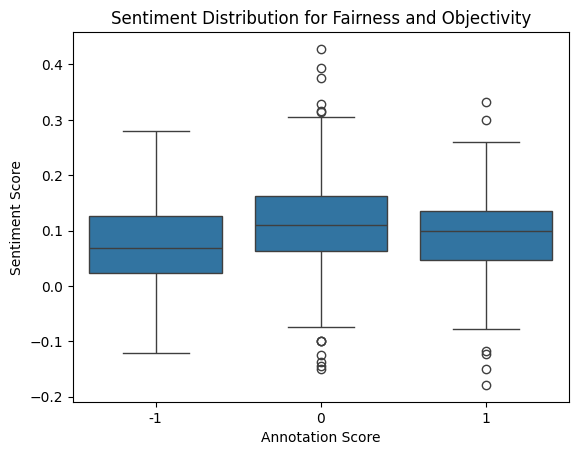

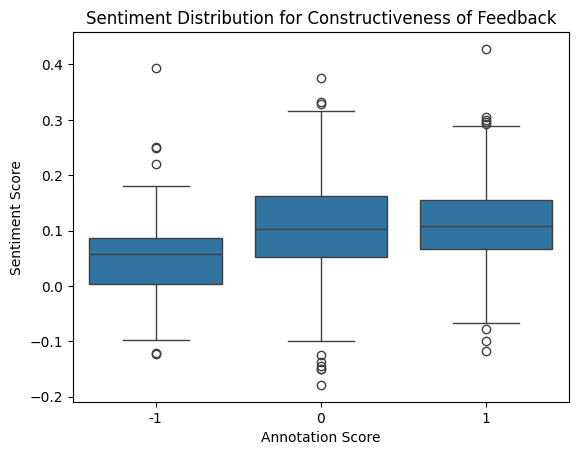

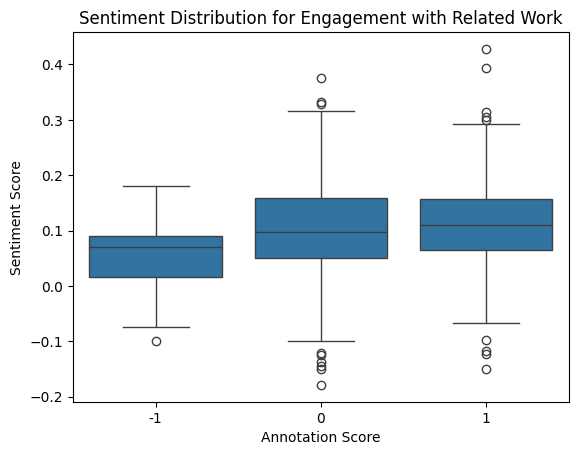

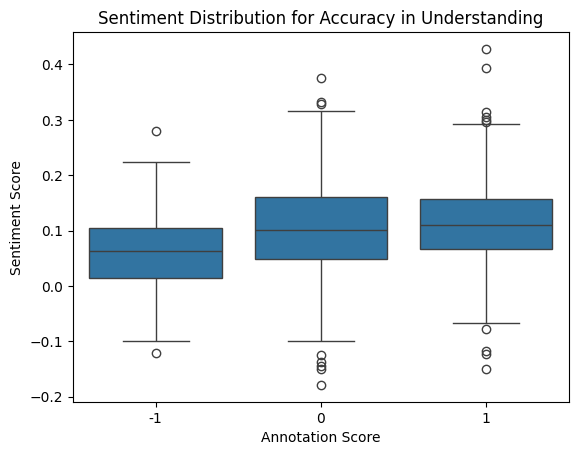

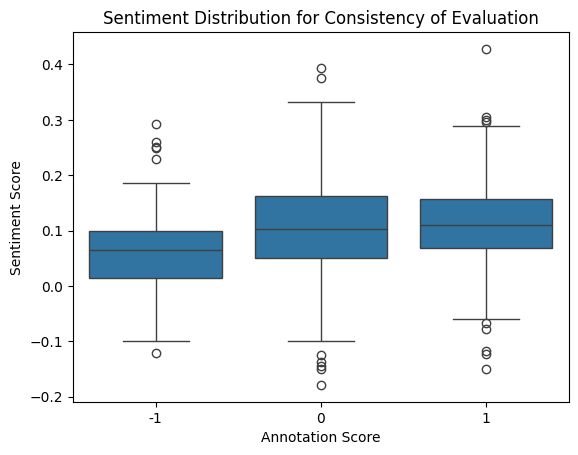

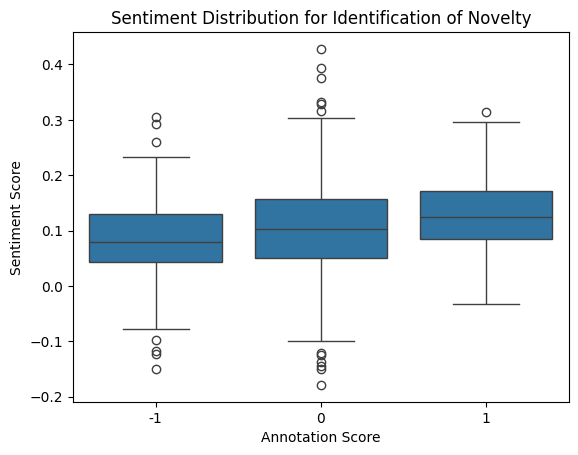

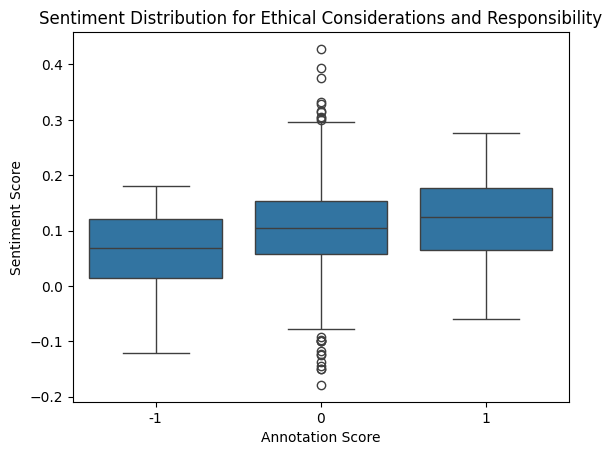

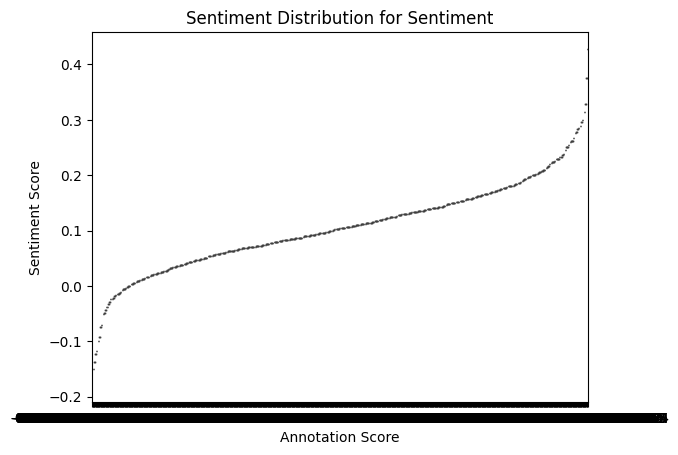

In [73]:
plt.figure(figsize=(12, 8))
for criterion in metrics:
    sns.boxplot(data=df, x=criterion, y='Sentiment')
    plt.title(f'Sentiment Distribution for {criterion}')
    plt.xlabel('Annotation Score')
    plt.ylabel('Sentiment Score')
    plt.show()

## Word Cloud Illustrations

In [74]:
mean_scores = df[metrics].mean()
print("Mean scores for each criterion:")
mean_scores

Mean scores for each criterion:


Clarity of Review                            0.868217
Justification of Scores                      0.810631
Depth of Analysis                            0.795127
Fairness and Objectivity                     0.069767
Constructiveness of Feedback                 0.462901
Engagement with Related Work                 0.457364
Accuracy in Understanding                    0.426357
Consistency of Evaluation                    0.410853
Identification of Novelty                    0.009967
Ethical Considerations and Responsibility    0.001107
Sentiment                                    0.106114
dtype: float64

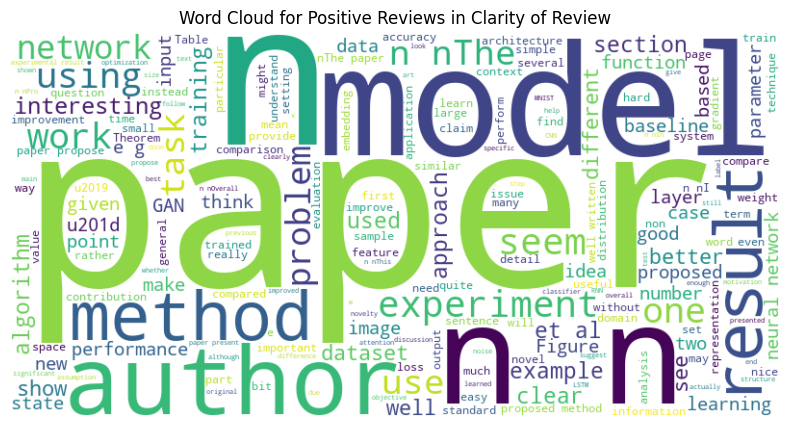

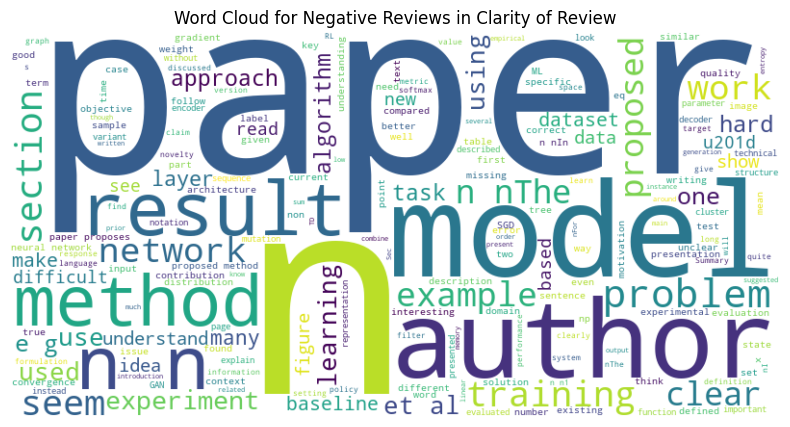

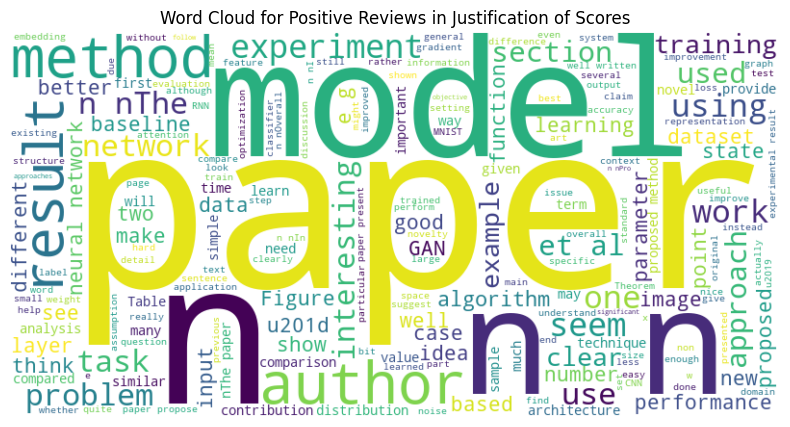

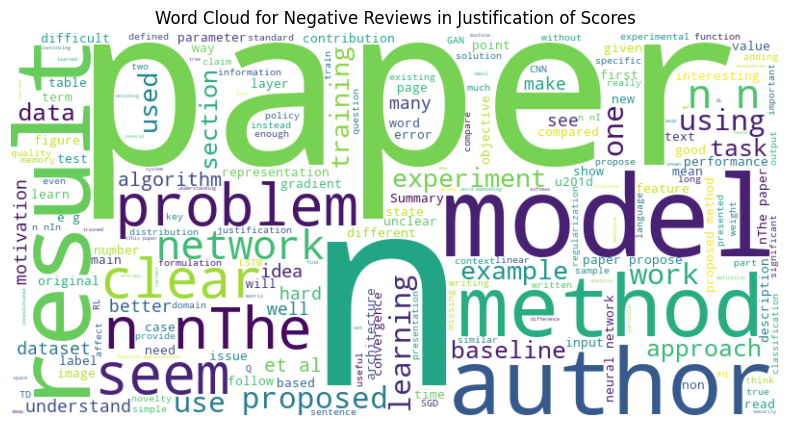

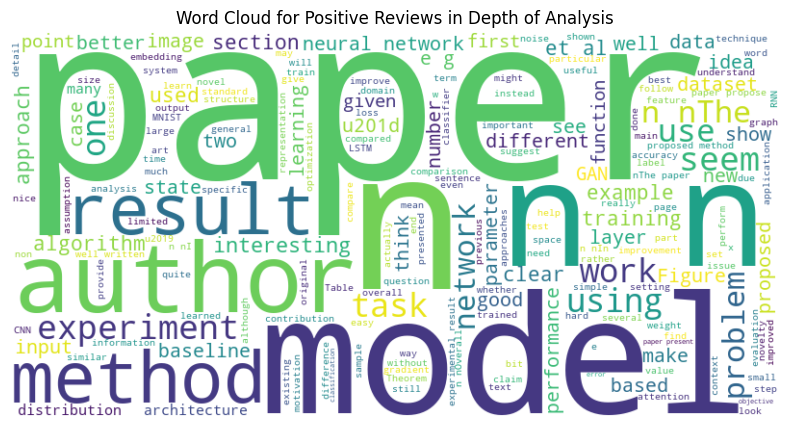

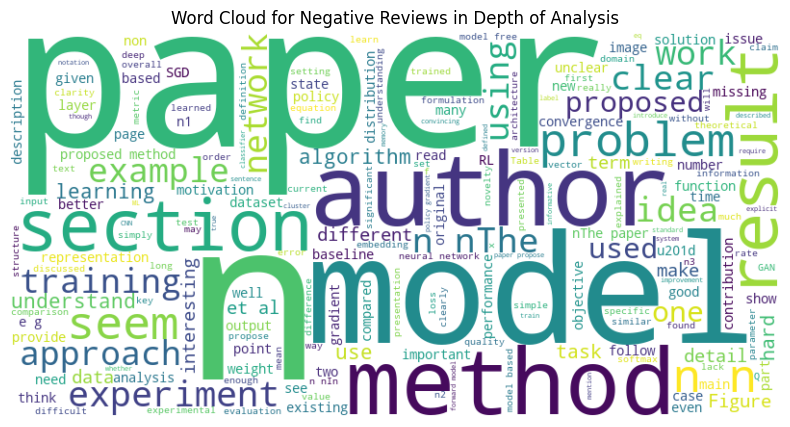

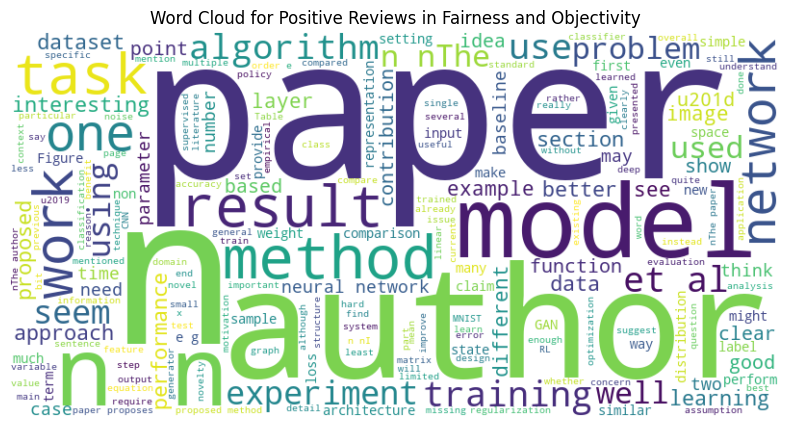

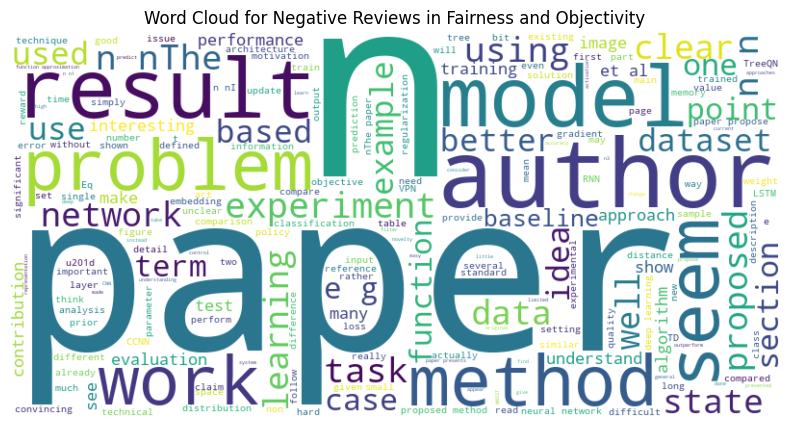

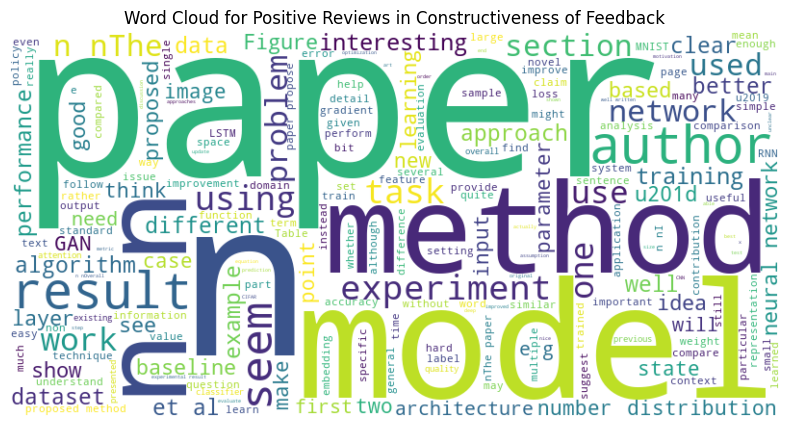

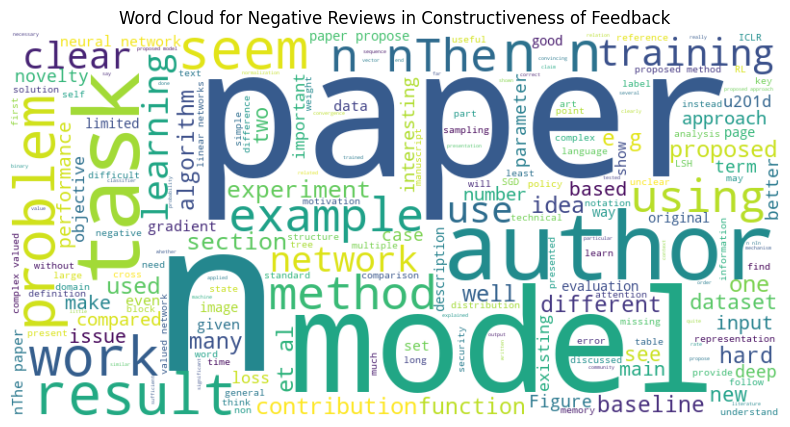

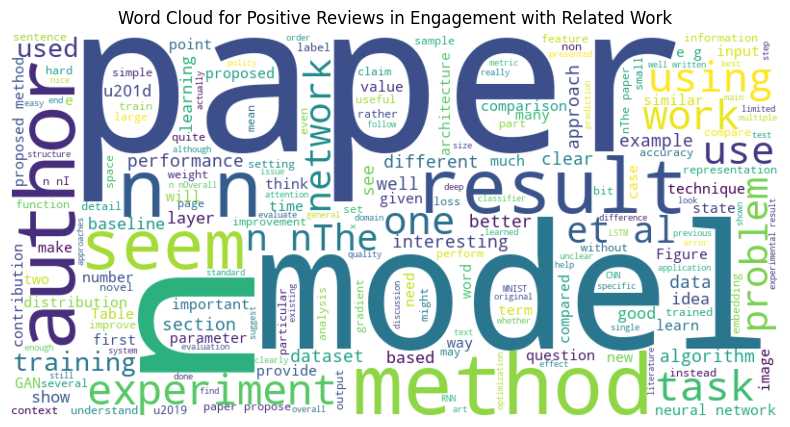

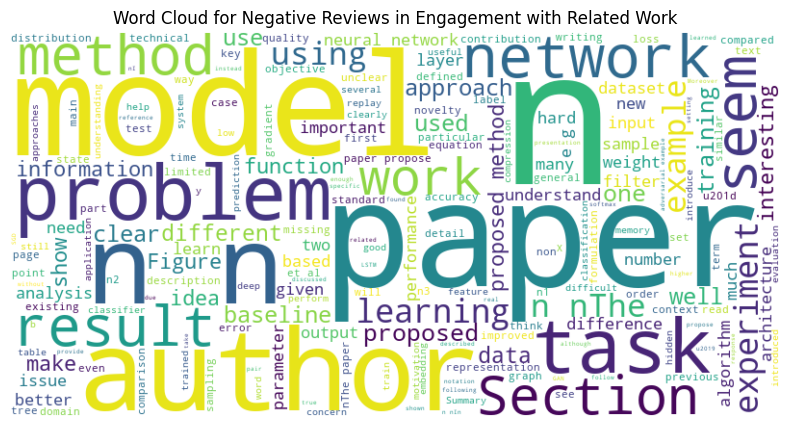

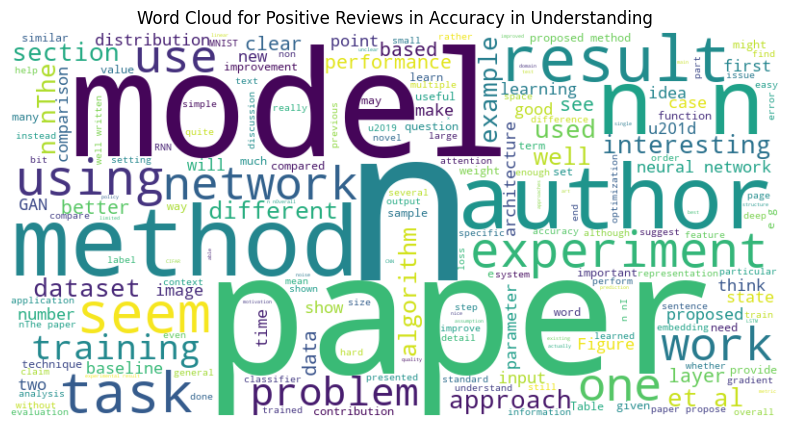

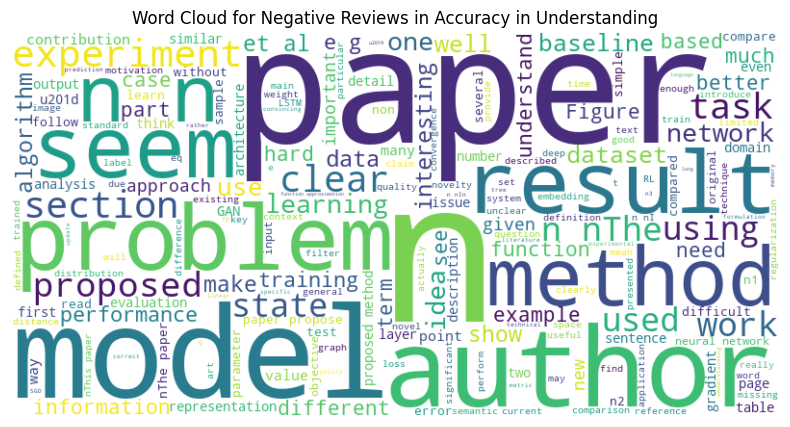

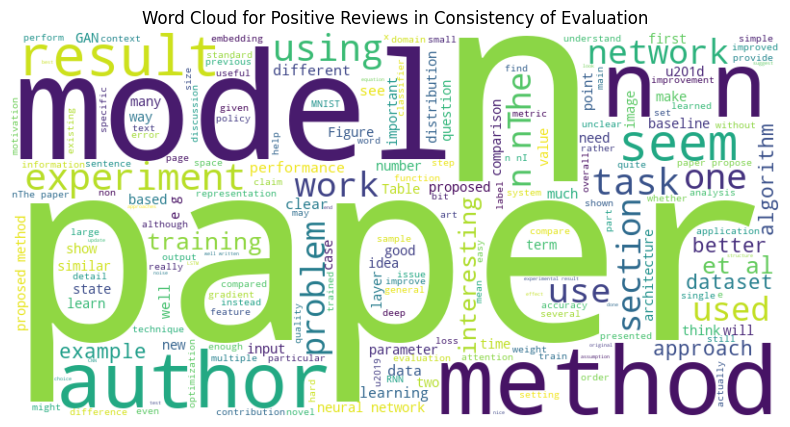

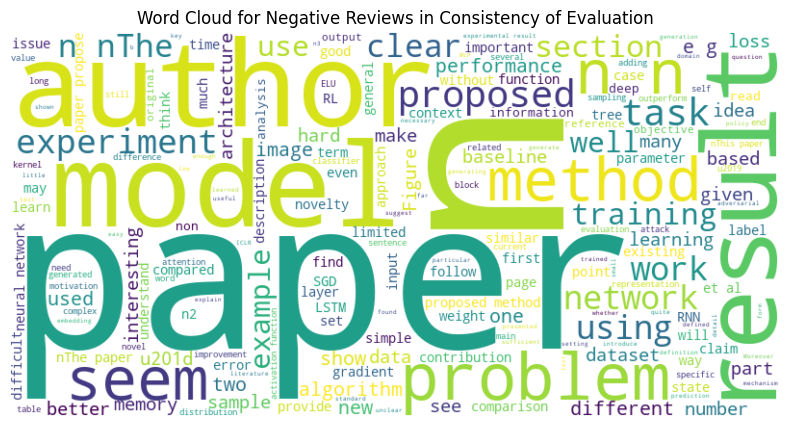

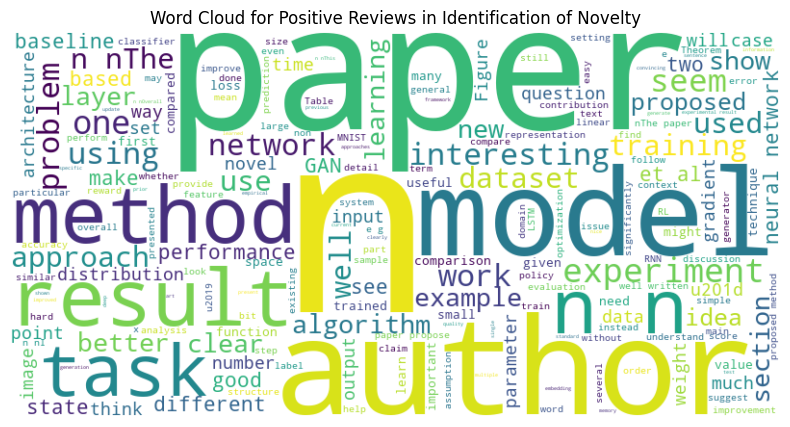

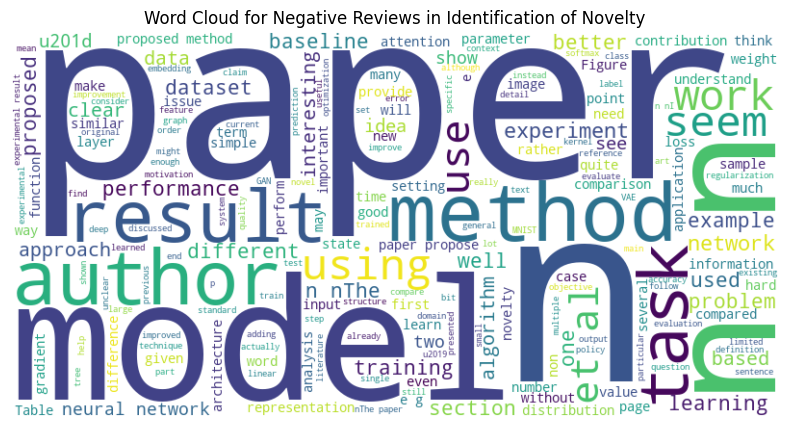

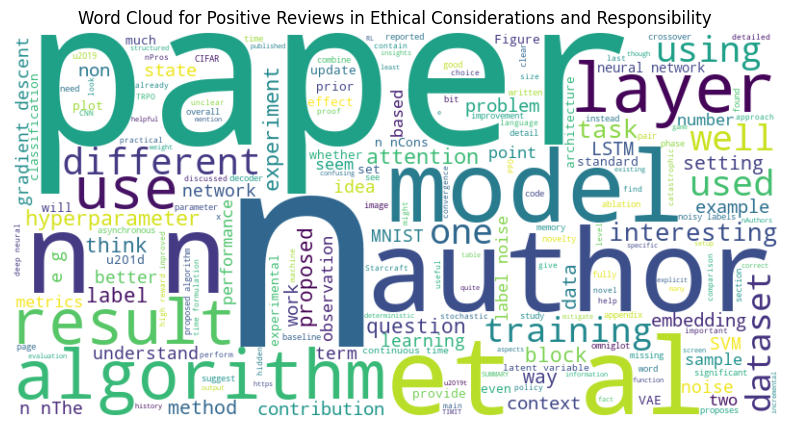

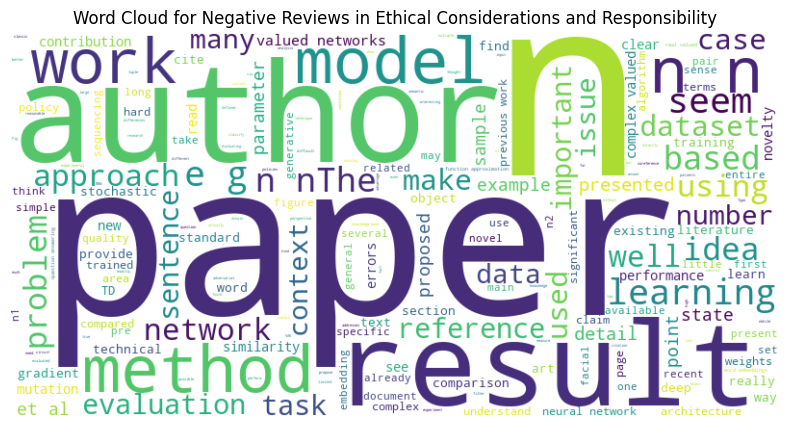

Graph for criterion not found!


<Figure size 1000x500 with 0 Axes>

In [92]:
from wordcloud import WordCloud

for criterion in metrics:
    try:
        positive_reviews = ' '.join(df[df[criterion] == 1]['Text'])
        negative_reviews = ' '.join(df[df[criterion] == -1]['Text'])

        plt.figure(figsize=(10, 5))
        wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
        plt.imshow(wordcloud_pos, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Positive Reviews in {criterion}')
        plt.show()

        plt.figure(figsize=(10, 5))
        wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
        plt.imshow(wordcloud_neg, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Negative Reviews in {criterion}')
        plt.show()
    except:
        print("Graph for criterion not found!")
        continue

## Writing dataset to a file

In [94]:
final_df = df.drop(columns=['Sentiment', 'Text Length', 'Cluster'])

In [95]:
final_df.head()

Index                                               Text  \
0  B11bwYgfM-R1  The idea of using cross-task transfer performa...   
1  B11bwYgfM-R2  This paper proposes a method for multitask and...   
2  B11bwYgfM-R3  The authors propose techniques for multitask a...   
3  B12Js_yRb-R1  \nSummary: \n- This paper proposes a hand-desi...   
4  B12Js_yRb-R2  Summary\n - This paper mainly focuses on a cou...   

   Clarity of Review  Justification of Scores  Depth of Analysis  \
0                  1                        1                  1   
1                  1                        1                  1   
2                  1                        1                  1   
3                  1                        1                  1   
4                  1                        1                  1   

   Fairness and Objectivity  Constructiveness of Feedback  \
0                         1                            -1   
1                         1                             1   
2                         1                             1   
3                         0                             0   
4                         0                             0   

   Engagement with Related Work  Accuracy in Understanding  \
0                             1                          1   
1                             1                          1   
2                             1                          1   
3                             0                          0   
4                             0                          0   

   Consistency of Evaluation  Identification of Novelty  \
0                          1                         -1   
1                          1                         -1   
2                          1                         -1   
3                          0                          0   
4                          0                          0   

   Ethical Considerations and Responsibility  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0

In [ ]:
final_df.to_csv("../../code/results/aggregated/clean_final_annotations.csv")